### K-Means Clustering in Python

Clustering is a type of Unsupervised learning. This is very often used when you don't have labeled data. K-Means Clustering is one of the popular clustering algorithm. The goal of this algorithm is to find groups(clusters) in the given data.

<img src="images/S65Sk9c.png">

#### Use Cases
K-Means is widely used for many applications.

* Image Segmentation
* Clustering Gene Segementation Data
* News Article Clustering
* Clustering Languages
* Species Clustering
* Anomaly Detection

#### Algorithm
Our algorithm works as follows, assuming we have inputs x_1, x_2, x_3, ..., x_n and value of K

* `Step 1` - Pick K random points as cluster centers called centroids.
* `Step 2` - Assign each x_i to nearest cluster by calculating its distance to each centroid.
* `Step 3` - Find new cluster center by taking the average of the assigned points.
* `Step 4` - Repeat Step 2 and 3 until none of the cluster assignments change.

<img src="images/KMeans.gif">

The above animation is an example of running K-Means Clustering on a two dimensional data.



In [3]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
# Importing the Dataset
data = pd.read_csv('Datasets/KMeansClustering.csv')
print(f"Shape of the Data is : {data.shape}")
data.head()

Shape of the Data is : (3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


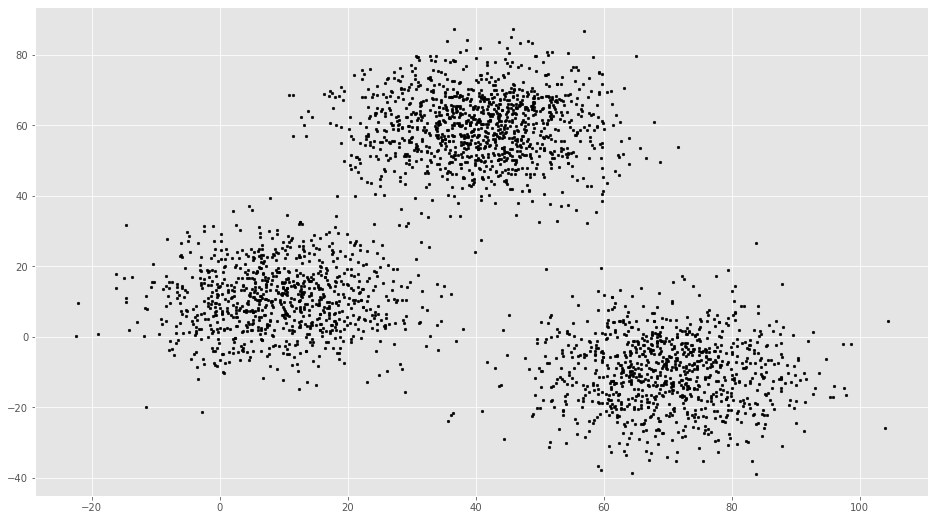

In [5]:
# Getting the Data and Plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [6]:
# Function to Calculate Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [9]:
# Number of Clusters
k=3

# X Coordinates of Random Centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y Coordinates of Random Centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x,C_y)), dtype=np.float32)

print(f"Shape of Random Centroids: {C.shape}")
print(C)

Shape of Random Centroids: (3, 2)
[[29. 54.]
 [72. 72.]
 [12.  6.]]


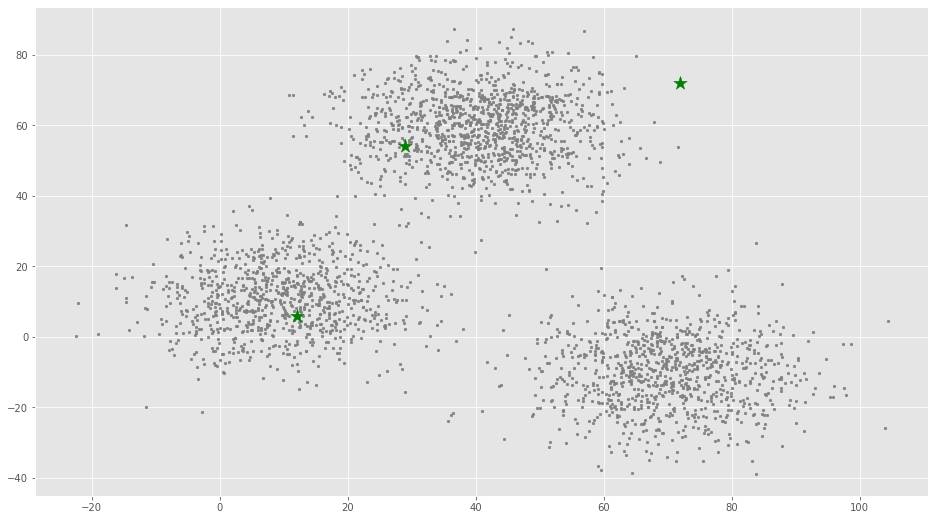

In [16]:
# Plotting Along with Centroids
plt.scatter(f1, f2, c="gray", s=7)
plt.scatter(C_x, C_y, marker="*", s=200, c='g');

In [24]:
# To Store the Value of Centroids When it Updates
C_Old = np.zeros(C.shape)

# Cluster Labels (0, 1, 2)
clusters = np.zeros(len(X))

# Error Function - Distance between new centroids and old centroids
error = dist(C, C_Old, None)

# loop Will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_Old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_Old, None)

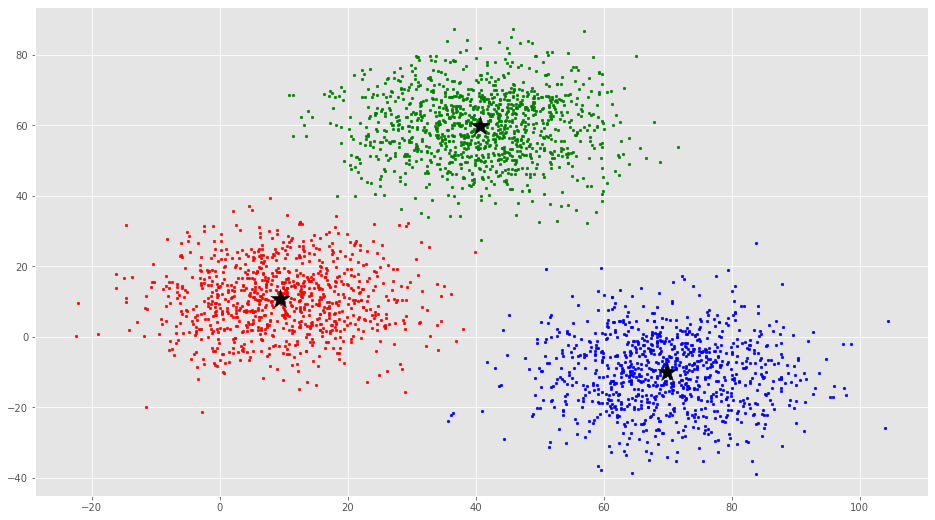

In [29]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker="*", s=400, c="#050505")
plt.show()

### Scikit-Learn Approach

In [30]:
from sklearn.cluster import KMeans

# Number of Clusters
kmeans = KMeans(n_clusters=3)
# Fitting the Input data
kmeans = kmeans.fit(X)
# Getting the Cluster Labels
labels = kmeans.predict(X)
# Centroid Values
centroids = kmeans.cluster_centers_

In [31]:
# Comparing with Scikit-Learn Centroids
print(C) # From Scratch
print(centroids) # From Scikit Learn

[[  9.478045  10.686052]
 [ 40.683628  59.715893]
 [ 69.92419  -10.119641]]
[[ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]]


### Conclusion
Even though it works very well, K-Means clustering has its own issues. That include:

If you run K-means on uniform data, you will get clusters.
Sensitive to scale due to its reliance on Euclidean distance.
Even on perfect data sets, it can get stuck in a local minimum